In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
import numpy as np
import os
import keras
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

Using TensorFlow backend.


### Prevent : "... your kernel died"

In [ ]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'


## Loading  MNIST dataset and splitting into training and testing data set

In [ ]:
(xtrain, ytrains), (xtest, ytests) = mnist.load_data()


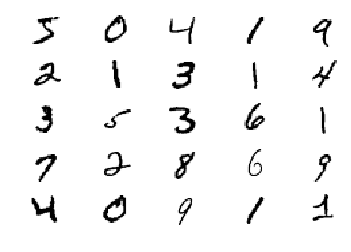

In [2]:

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(xtrain[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [3]:
xtrain.shape

(60000, 28, 28)

## Reshape the y-labels into dummy variables

In [32]:
ytrain= pd.get_dummies(ytrains)
ytest= pd.get_dummies(ytests)


(10000, 10)

## Checking for  some training set data in detail

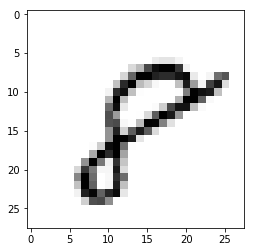

In [5]:
plt.imshow(xtrain[59999], cmap=plt.cm.Greys)

# Arificial Neural Network

In [6]:
tboard = keras.callbacks.TensorBoard(log_dir='./output',
                                     histogram_freq=0,
                                     write_graph=True,
                                     write_images=True)





model = Sequential([
    Dense(32, input_shape=(28,28)),
    Activation('elu'),
    Flatten(),
    Dense(10),
    Activation('softmax'),
])



model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

xtrain.shape
ytrain.shape

model.fit(xtrain, ytrain,
          batch_size= 128,
          epochs=150,
          verbose=1,
         )

Epoch 1/150
60000/60000 [==============================] - 6s 102us/step - loss: 5.8399 - acc: 0.6270
Epoch 2/150
60000/60000 [==============================] - 5s 84us/step - loss: 3.3112 - acc: 0.7861
Epoch 3/150
60000/60000 [==============================] - 5s 84us/step - loss: 2.6922 - acc: 0.8260
Epoch 4/150
60000/60000 [==============================] - 5s 85us/step - loss: 2.5075 - acc: 0.8389
Epoch 5/150
60000/60000 [==============================] - 5s 84us/step - loss: 2.3981 - acc: 0.8458
Epoch 6/150
60000/60000 [==============================] - 5s 86us/step - loss: 2.3254 - acc: 0.8506
Epoch 7/150
60000/60000 [==============================] - 5s 86us/step - loss: 2.2715 - acc: 0.8545
Epoch 8/150
60000/60000 [==============================] - 5s 84us/step - loss: 2.2390 - acc: 0.8569
Epoch 9/150
60000/60000 [==============================] - 6s 99us/step - loss: 2.2037 - acc: 0.8589
Epoch 10/150
60000/60000 [==============================] - 6s 99us/step - loss: 2.1737 - 

60000/60000 [==============================] - 6s 102us/step - loss: 0.4571 - acc: 0.9689
Epoch 82/150
60000/60000 [==============================] - 7s 119us/step - loss: 0.4388 - acc: 0.9702
Epoch 83/150
60000/60000 [==============================] - 6s 104us/step - loss: 0.4335 - acc: 0.9709
Epoch 84/150
60000/60000 [==============================] - 5s 83us/step - loss: 0.4472 - acc: 0.9700
Epoch 85/150
60000/60000 [==============================] - 7s 115us/step - loss: 0.4442 - acc: 0.9702
Epoch 86/150
60000/60000 [==============================] - 5s 91us/step - loss: 0.4428 - acc: 0.9703
Epoch 87/150
60000/60000 [==============================] - 5s 90us/step - loss: 0.4375 - acc: 0.9705
Epoch 88/150
60000/60000 [==============================] - 5s 80us/step - loss: 0.4438 - acc: 0.9701
Epoch 89/150
60000/60000 [==============================] - 5s 81us/step - loss: 0.4387 - acc: 0.9704
Epoch 90/150
60000/60000 [==============================] - 6s 99us/step - loss: 0.4346 - a

# Evaluating Test and Training Data

In [7]:
score = model.evaluate(xtest, ytest, batch_size=128)
score
train= model.evaluate(xtrain, ytrain, batch_size=128)
train, score


60000/60000 [==============================] - 3s 46us/step


([0.39850181577429966, 0.9738666666348775], [0.6967085278276878, 0.9547])

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 28, 32)            928       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 896)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                8970      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 9,898
Trainable params: 9,898
Non-trainable params: 0
_________________________________________________________________


## Which number  was wrongly predicted by the model?

In [10]:
# What was predicted by the model?
predicted =model.predict_classes(xtrain)

In [11]:
#Create a Dataframe out of it?
df=pd.DataFrame(predicted)
df.rename(columns={
          0 : 'Prediction'}, inplace = True)

In [12]:
df['Original']= ytrains

#Difference between Original and Predicted

df['Wrongly Predicted']= df['Prediction']==df['Original']

In [13]:
#Create a dataframe including only wrongly predicted variables?

df_FPred=df[df['Wrongly Predicted']== False]

In [14]:
df_group = df_FPred.groupby(['Original', 'Prediction'])[['Wrongly Predicted']].count()
df1 =df_group.unstack()
# df1 is a table 

In [15]:
df_group1=df_FPred.groupby(['Original'])[['Wrongly Predicted']].count()
dftest = df_group1.reset_index(drop=True)
dftest

,Wrongly Predicted
0,64
1,110
2,161
3,190
4,130
5,256
6,91
7,116
8,232
9,218


In [16]:
b = np.round((df1.values/dftest.values *100),1)
df1.values.shape

(10, 10)

## In % ?

In [19]:
df12 = pd.DataFrame(b,index=range(0,10), columns=range(0,10))
df12

,0,1,2,3,4,5,6,7,8,9
0,NaN,NaN,17.2,9.4,6.2,10.9,10.9,3.1,32.8,9.4
1,0.9,NaN,46.4,11.8,NaN,2.7,0.9,10.0,19.1,8.2
2,3.1,3.7,NaN,32.3,3.7,5.0,5.6,16.8,23.6,6.2
3,5.3,1.6,32.1,NaN,0.5,13.7,2.1,14.2,14.2,16.3
4,9.2,3.1,6.9,3.1,NaN,0.8,5.4,6.2,7.7,57.7
5,5.5,1.2,6.6,50.8,2.0,NaN,6.6,2.7,12.5,12.1
6,24.2,4.4,12.1,1.1,11.0,20.9,NaN,NaN,25.3,1.1
7,2.6,7.8,26.7,15.5,11.2,2.6,0.9,NaN,3.4,29.3
8,9.5,6.0,17.2,33.6,6.0,8.6,3.9,2.6,NaN,12.5
9,7.3,1.4,5.0,19.7,14.2,7.8,0.5,34.9,9.2,NaN


# Using PCA: Does it change the result?

In [21]:
m = PCA(n_components=50)

In [22]:
x_PCAt =xtrain.reshape(60000,784)

In [23]:
m.fit_transform(x_PCAt)

array([[ 123.93258866, -312.67426202,  -24.51405179, ...,  -86.77816691,
          37.76180001,   41.19713789],
       [1011.71837587, -294.85703826,  596.33956102, ..., -187.94787825,
         102.95908132,  -27.77493889],
       [ -51.84960805,  392.17315286, -188.50974947, ...,   44.90004696,
        -142.56569418,  -16.83129446],
       ...,
       [-178.0534496 ,  160.07821108, -257.61308227, ...,    1.22141826,
         102.44027335,  172.16952151],
       [ 130.60607208,   -5.59193642,  513.85867394, ...,    2.40722602,
          17.55470063,  -50.90350487],
       [-173.43595244,  -24.71880226,  556.0188939 , ..., -108.08341701,
         177.68807873,    8.76450678]])

In [24]:
comps =m.components_

In [38]:
explained_variance =m.explained_variance_ratio_

## What is the explained variance of the model?

In [37]:
explained_varience.sum()

NameError: name 'explained_varience' is not defined